# TEST OF DIFFERENT LOGIT MODEL CALIBRATIONS

This document could potentially be used to test whichever logit calibration

## 1. Import libraries and download files

In [1]:
# libraries to import
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from ast import literal_eval
from typing import Dict
import biogeme
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
print(os.getcwd())
os.chdir(r"C:\Users\LMENENDEZ\GitHub\MultiModX")
print(os.getcwd())
pd.set_option('display.max_columns', None)

c:\Users\LMENENDEZ\GitHub\MultiModX\notebooks
C:\Users\LMENENDEZ\GitHub\MultiModX


In [2]:
%load_ext autoreload

In [3]:
%autoreload
from strategic_evaluator.logit_model import *
from script.trips_format import *

In [4]:
trips_logit=pd.read_csv(r"C:\Users\LMENENDEZ\GitHub\MultiModX\trips_logit_CS10_2_conn.csv")

In [5]:
trips_logit_old=pd.read_csv(r"C:\Users\LMENENDEZ\GitHub\MultiModX\trips_logit.csv")

In [6]:
#import the file necessary to calibrate the logit model 
trips_logit_old.head()

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,total_travel_time,total_cost,total_emissions
0,ES111,ES112,"['007131412', '007120300']",58.504,45.967302,0.895619,1.064722,4.659657,2.642030,3.274670,1.0,43.0,74.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.500000,10.89,3.41
1,ES111,ES113,"['007131400', '007122100']",831.820,638.068954,17.071497,16.351680,68.127097,37.168519,55.032253,1.0,61.0,28.0,42.733333,7.40,2.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.733333,7.40,2.32
2,ES111,ES113,"['007131412', '007120300']",5.003,3.764162,0.087354,0.135002,0.524124,0.190590,0.301768,1.0,43.0,69.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.500000,10.89,3.41
3,ES111,ES113,"['007131412', '007122100']",298.436,228.508198,6.682714,5.530960,23.093871,14.035849,20.584408,1.0,43.0,28.0,78.571429,11.09,3.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.571429,11.09,3.47
4,ES111,ES114,"['007131400', '007122100']",19.007,14.148943,0.596662,0.475672,1.545168,0.858479,1.382076,1.0,61.0,90.0,42.733333,7.40,2.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.733333,7.40,2.32


In [7]:
trips_logit=trips_logit_format(trips_logit)

In [8]:
trips_logit_improved=trips_logit_format(trips_logit,drop_single_paths=True)

no need to calculate probabilities for archetype_0
no need to calculate probabilities for archetype_1
no need to calculate probabilities for archetype_2
no need to calculate probabilities for archetype_3
no need to calculate probabilities for archetype_4
no need to calculate probabilities for archetype_5


In [9]:
trips_logit_improved.head()

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
0,ES111,ES113,"['007131400', '007122100']",831.820,638.068954,17.071497,16.351680,68.127097,37.168519,55.032253,1.0,61.0,28.0,42.733333,7.40,2.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.733333,7.40,2.32,1,1135.259,870.341315,0.733125,23.841565,0.716039,22.017641,0.742663,91.745092,0.742569,51.394958,0.723194,75.91843,0.724887
1,ES111,ES113,"['007131412', '007122100']",298.436,228.508198,6.682714,5.530960,23.093871,14.035849,20.584408,1.0,43.0,28.0,78.571429,11.09,3.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.571429,11.09,3.47,2,1135.259,870.341315,0.262550,23.841565,0.280297,22.017641,0.251206,91.745092,0.251718,51.394958,0.273098,75.91843,0.271138
2,ES111,ES113,"['007131412', '007120300']",5.003,3.764162,0.087354,0.135002,0.524124,0.190590,0.301768,1.0,43.0,69.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.500000,10.89,3.41,3,1135.259,870.341315,0.004325,23.841565,0.003664,22.017641,0.006132,91.745092,0.005713,51.394958,0.003708,75.91843,0.003975
3,ES111,ES114,"['007131412', '007123004']",470.356,331.036817,15.922206,12.295786,51.267123,22.336955,37.497113,1.0,43.0,31.0,77.266667,9.74,3.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.266667,9.74,3.05,1,742.468,524.662658,0.630952,24.544201,0.648716,19.613536,0.626903,78.447439,0.653522,36.069526,0.619275,59.13064,0.634140
4,ES111,ES114,"['007131400', '007123004']",250.284,178.501300,7.842317,6.669803,24.916093,12.508677,19.845810,1.0,61.0,31.0,46.947368,4.67,1.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.947368,4.67,1.46,2,742.468,524.662658,0.340221,24.544201,0.319518,19.613536,0.340061,78.447439,0.317615,36.069526,0.346793,59.13064,0.335626


In [10]:
trips_logit_old=trips_logit_format(trips_logit_old)

In [11]:
trips_logit.head()

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
0,ES111,ES112,"['007131412', '007120300']",58.504,45.967302,0.895619,1.064722,4.659657,2.642030,3.274670,1.0,43.0,74.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.500000,10.89,3.41,1,58.504,45.967302,1.000000,0.895619,1.000000,1.064722,1.000000,4.659657,1.000000,2.642030,1.000000,3.27467,1.000000
1,ES111,ES113,"['007131400', '007122100']",831.820,638.068954,17.071497,16.351680,68.127097,37.168519,55.032253,1.0,61.0,28.0,42.733333,7.40,2.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.733333,7.40,2.32,1,1135.259,870.341315,0.733125,23.841565,0.716039,22.017641,0.742663,91.745092,0.742569,51.394958,0.723194,75.91843,0.724887
3,ES111,ES113,"['007131412', '007122100']",298.436,228.508198,6.682714,5.530960,23.093871,14.035849,20.584408,1.0,43.0,28.0,78.571429,11.09,3.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.571429,11.09,3.47,2,1135.259,870.341315,0.262550,23.841565,0.280297,22.017641,0.251206,91.745092,0.251718,51.394958,0.273098,75.91843,0.271138
2,ES111,ES113,"['007131412', '007120300']",5.003,3.764162,0.087354,0.135002,0.524124,0.190590,0.301768,1.0,43.0,69.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.500000,10.89,3.41,3,1135.259,870.341315,0.004325,23.841565,0.003664,22.017641,0.006132,91.745092,0.005713,51.394958,0.003708,75.91843,0.003975
8,ES111,ES114,"['007131412', '007123004']",470.356,331.036817,15.922206,12.295786,51.267123,22.336955,37.497113,1.0,43.0,31.0,77.266667,9.74,3.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.266667,9.74,3.05,1,770.474,524.662658,0.630952,24.544201,0.648716,19.613536,0.626903,78.447439,0.653522,36.069526,0.619275,59.13064,0.634140


In [12]:
trips_logit_old.head()

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
0,ES111,ES112,"['007131412', '007120300']",58.504,45.967302,0.895619,1.064722,4.659657,2.642030,3.274670,1.0,43.0,74.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296.500000,10.89,3.41,1,58.504,45.967302,1.000000,0.895619,1.000000,1.064722,1.000000,4.659657,1.000000,2.642030,1.000000,3.27467,1.000000
1,ES111,ES113,"['007131400', '007122100']",831.820,638.068954,17.071497,16.351680,68.127097,37.168519,55.032253,1.0,61.0,28.0,42.733333,7.40,2.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131.733333,7.40,2.32,1,1135.259,870.341315,0.733125,23.841565,0.716039,22.017641,0.742663,91.745092,0.742569,51.394958,0.723194,75.91843,0.724887
3,ES111,ES113,"['007131412', '007122100']",298.436,228.508198,6.682714,5.530960,23.093871,14.035849,20.584408,1.0,43.0,28.0,78.571429,11.09,3.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.571429,11.09,3.47,2,1135.259,870.341315,0.262550,23.841565,0.280297,22.017641,0.251206,91.745092,0.251718,51.394958,0.273098,75.91843,0.271138
2,ES111,ES113,"['007131412', '007120300']",5.003,3.764162,0.087354,0.135002,0.524124,0.190590,0.301768,1.0,43.0,69.0,179.500000,10.89,3.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291.500000,10.89,3.41,3,1135.259,870.341315,0.004325,23.841565,0.003664,22.017641,0.006132,91.745092,0.005713,51.394958,0.003708,75.91843,0.003975
8,ES111,ES114,"['007131412', '007123004']",470.356,331.036817,15.922206,12.295786,51.267123,22.336955,37.497113,1.0,43.0,31.0,77.266667,9.74,3.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.266667,9.74,3.05,1,770.474,524.662658,0.630952,24.544201,0.648716,19.613536,0.626903,78.447439,0.653522,36.069526,0.619275,59.13064,0.634140


In [13]:
paths_w_costs=generate_paths_w_costs(trips_logit)

In [14]:
paths_w_costs[paths_w_costs.isna().any(axis=1)]

,origin,destination,travel_time_1,cost_1,emissions_1,train_1,plane_1,multimodal_1,av_1,travel_time_2,cost_2,emissions_2,train_2,plane_2,multimodal_2,av_2,travel_time_3,cost_3,emissions_3,train_3,plane_3,multimodal_3,av_3


In [17]:
paths_w_costs_improved=generate_paths_w_costs(trips_logit_improved)

In [18]:
paths_w_costs_improved.head()

,origin,destination,travel_time_1,cost_1,emissions_1,train_1,plane_1,multimodal_1,av_1,travel_time_2,cost_2,emissions_2,train_2,plane_2,multimodal_2,av_2,travel_time_3,cost_3,emissions_3,train_3,plane_3,multimodal_3,av_3
0,ES111,ES113,131.733333,7.40,2.32,1,0,0,1,149.571429,11.09,3.47,1,0,0,1,291.500,10.89,3.41,1,0,0,1
3,ES111,ES114,151.266667,9.74,3.05,1,0,0,1,138.947368,4.67,1.46,1,0,0,1,174.375,6.05,1.89,1,0,0,1
6,ES111,ES130,317.000000,132.79,69.96,0,1,0,1,289.000000,132.17,42.06,0,1,0,1,-1.000,-1.00,-1.00,0,0,0,0
8,ES111,ES211,293.000000,132.79,69.96,0,1,0,1,265.000000,132.17,42.06,0,1,0,1,-1.000,-1.00,-1.00,0,0,0,0
10,ES111,ES212,316.000000,132.79,69.96,0,1,0,1,288.000000,132.17,42.06,0,1,0,1,-1.000,-1.00,-1.00,0,0,0,0


In [16]:
calibration_matrix=generate_calibration_matrix(trips_logit,paths_w_costs)

In [19]:
calibration_matrix_improved=generate_calibration_matrix(trips_logit_improved,paths_w_costs_improved,drop_single_paths=True)

In [20]:
calibration_matrix_improved.head()

,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,total_travel_time,observed_choice,travel_time_1,cost_1,emissions_1,train_1,plane_1,multimodal_1,av_1,travel_time_2,cost_2,emissions_2,train_2,plane_2,multimodal_2,av_2,travel_time_3,cost_3,emissions_3,train_3,plane_3,multimodal_3,av_3
0,831.820,638.068954,17.071497,16.351680,68.127097,37.168519,55.032253,131.733333,1,131.733333,7.40,2.32,1,0,0,1,149.571429,11.09,3.47,1,0,0,1,291.500,10.89,3.41,1,0,0,1
1,298.436,228.508198,6.682714,5.530960,23.093871,14.035849,20.584408,149.571429,2,131.733333,7.40,2.32,1,0,0,1,149.571429,11.09,3.47,1,0,0,1,291.500,10.89,3.41,1,0,0,1
2,5.003,3.764162,0.087354,0.135002,0.524124,0.190590,0.301768,291.500000,3,131.733333,7.40,2.32,1,0,0,1,149.571429,11.09,3.47,1,0,0,1,291.500,10.89,3.41,1,0,0,1
3,470.356,331.036817,15.922206,12.295786,51.267123,22.336955,37.497113,151.266667,1,151.266667,9.74,3.05,1,0,0,1,138.947368,4.67,1.46,1,0,0,1,174.375,6.05,1.89,1,0,0,1
4,250.284,178.501300,7.842317,6.669803,24.916093,12.508677,19.845810,138.947368,2,151.266667,9.74,3.05,1,0,0,1,138.947368,4.67,1.46,1,0,0,1,174.375,6.05,1.89,1,0,0,1


In [21]:
calibration_matrix_improved[calibration_matrix_improved.isna().any(axis=1)]

,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,total_travel_time,observed_choice,travel_time_1,cost_1,emissions_1,train_1,plane_1,multimodal_1,av_1,travel_time_2,cost_2,emissions_2,train_2,plane_2,multimodal_2,av_2,travel_time_3,cost_3,emissions_3,train_3,plane_3,multimodal_3,av_3


In [22]:
calibration_matrix[calibration_matrix.isna().any(axis=1)]

,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,total_travel_time,observed_choice,travel_time_1,cost_1,emissions_1,train_1,plane_1,multimodal_1,av_1,travel_time_2,cost_2,emissions_2,train_2,plane_2,multimodal_2,av_2,travel_time_3,cost_3,emissions_3,train_3,plane_3,multimodal_3,av_3


In [23]:
calibration_matrix.to_csv("calibration_matrix_CS10_2_conn.csv",index=False)

In [24]:
calibration_matrix_improved.to_csv("calibration_matrix_improved_CS10_2_conn.csv",index=False)

In [25]:
calibration_matrix["observed_choice"].value_counts()

observed_choice
1    1491
2     661
3     283
Name: count, dtype: int64

In [26]:
trips_logit["noption"].value_counts()

noption
1    1491
2     661
3     283
Name: count, dtype: int64

In [27]:
calibration_matrix_improved["observed_choice"].value_counts()

observed_choice
1    661
2    661
3    283
Name: count, dtype: int64

In [28]:
trips_logit_improved["noption"].value_counts()

noption
1    661
2    661
3    283
Name: count, dtype: int64

## 2. Download calibration results of generate new calibration results

Let us compare more thorougbly the normal calibration and the calibration without the rows with one single option

Frist we calibrate eliminating the single option O-D pairs

In [29]:
# Delete pickle files if they already exist for archetypes 0 to 5
for k in range(6):
    pickle_file = f"archetype_{k}.pickle"
    if os.path.exists(pickle_file):
        os.remove(pickle_file)
        print(f"Deleted {pickle_file}")
    else:
        print(f"{pickle_file} does not exist.")

archetype_0.pickle does not exist.
archetype_1.pickle does not exist.
archetype_2.pickle does not exist.
archetype_3.pickle does not exist.
archetype_4.pickle does not exist.
archetype_5.pickle does not exist.


In [42]:
# test without fixed parameters
database_path = r"C:\Users\LMENENDEZ\GitHub\MultiModX\calibration_matrix_CS10.csv"
n_archetypes = 6
n_alternatives = 3
test=calibrate_main(database_path, n_archetypes, n_alternatives)

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...


Training results:
Results for model archetype_0
Nbr of parameters:		5
Sample size:			1950
Excluded data:			0
Final log likelihood:		-1140.463
Akaike Information Criterion:	2290.927
Bayesian Information Criterion:	2318.805

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE -0.131356      1.268850    -0.103524      0.917547
ASC_TRAIN -0.091121      1.297526    -0.070227      0.944013
B_CO2     -0.031994      0.011798    -2.711762      0.006693
B_COST     0.000971      0.005934     0.163568      0.870071
B_TIME    -0.018995      0.001370   -13.859713      0.000000
{'ASC_PLANE': np.float64(-0.13135579501763903), 'ASC_TRAIN': np.float64(-0.09112116030156221), 'B_CO2': np.float64(-0.031994282864653785), 'B_COST': np.float64(0.0009705475725185267), 'B_TIME': np.float64(-0.018994664360340828)}
Test results:
{'ASC_PLANE': np.float64(-0.13135579501763903), 'ASC_TRAIN': np.float64(-0.09112116030156221), 'B_CO2': np.float64(-0.031994282864653785), 'B_COST': np.float64(0.000970

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]

Training results:
Results for model archetype_1
Nbr of parameters:		5
Sample size:			1950
Excluded data:			0
Final log likelihood:		-947.817
Akaike Information Criterion:	1905.634
Bayesian Information Criterion:	1933.512

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.502951      1.381752     1.087714      0.276721
ASC_TRAIN  1.141712      1.404663     0.812801      0.416332
B_CO2     -0.027743      0.011819    -2.347302      0.018910
B_COST    -0.005966      0.006089    -0.979798      0.327186
B_TIME    -0.016113      0.001227   -13.128717      0.000000
{'ASC_PLANE': np.float64(1.5029514265648871), 'ASC_TRAIN': np.float64(1.1417116776069394), 'B_CO2': np.float64(-0.02774320815895456), 'B_COST': np.float64(-0.005966383669181249), 'B_TIME': np.float64(-0.01611286850280101)}
Test results:
{'ASC_PLANE': np.float64(1.5029514265648871), 'ASC_TRAIN': np.float64(1.1417116776069394), 'B_CO2': np.float64(-0.02774320815895456), 'B_COST': np.float64(-0.00596638366918124

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...


Training results:
Results for model archetype_2
Nbr of parameters:		5
Sample size:			1950
Excluded data:			0
Final log likelihood:		-1050.862
Akaike Information Criterion:	2111.725
Bayesian Information Criterion:	2139.603

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.451353      2.197822     0.660359      0.509023
ASC_TRAIN  1.300655      2.209563     0.588648      0.556097
B_CO2     -0.028234      0.011698    -2.413523      0.015799
B_COST    -0.003818      0.005905    -0.646675      0.517842
B_TIME    -0.016970      0.001231   -13.784363      0.000000
{'ASC_PLANE': np.float64(1.4513525641652436), 'ASC_TRAIN': np.float64(1.3006550482203643), 'B_CO2': np.float64(-0.028233532530591927), 'B_COST': np.float64(-0.0038183773102942694), 'B_TIME': np.float64(-0.01697008664423167)}
Test results:
{'ASC_PLANE': np.float64(1.4513525641652436), 'ASC_TRAIN': np.float64(1.3006550482203643), 'B_CO2': np.float64(-0.028233532530591927), 'B_COST': np.float64(-0.0038183773102

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...


Training results:
Results for model archetype_3
Nbr of parameters:		5
Sample size:			1950
Excluded data:			0
Final log likelihood:		-992.4395
Akaike Information Criterion:	1994.879
Bayesian Information Criterion:	2022.757

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  0.152930      0.896913     0.170507      0.864611
ASC_TRAIN -0.231118      0.926580    -0.249431      0.803027
B_CO2     -0.021961      0.010355    -2.120756      0.033942
B_COST    -0.007191      0.005243    -1.371432      0.170240
B_TIME    -0.014738      0.001138   -12.949993      0.000000
{'ASC_PLANE': np.float64(0.15293009975778998), 'ASC_TRAIN': np.float64(-0.2311183208544101), 'B_CO2': np.float64(-0.02196123261062276), 'B_COST': np.float64(-0.007190831303655813), 'B_TIME': np.float64(-0.014737917914630572)}
Test results:
{'ASC_PLANE': np.float64(0.15293009975778998), 'ASC_TRAIN': np.float64(-0.2311183208544101), 'B_CO2': np.float64(-0.02196123261062276), 'B_COST': np.float64(-0.00719083130

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...
The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...


Training results:
Results for model archetype_4
Nbr of parameters:		5
Sample size:			1950
Excluded data:			0
Final log likelihood:		-1140.277
Akaike Information Criterion:	2290.553
Bayesian Information Criterion:	2318.431

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.069462      1.773148     0.603143      0.546414
ASC_TRAIN  0.904409      1.787339     0.506009      0.612851
B_CO2     -0.030123      0.010035    -3.001665      0.002685
B_COST    -0.002238      0.004799    -0.466375      0.640947
B_TIME    -0.015800      0.001135   -13.920758      0.000000
{'ASC_PLANE': np.float64(1.069461772737972), 'ASC_TRAIN': np.float64(0.9044088686134854), 'B_CO2': np.float64(-0.030122680400487347), 'B_COST': np.float64(-0.0022380726574633006), 'B_TIME': np.float64(-0.01579961001899317)}
Test results:
{'ASC_PLANE': np.float64(1.069461772737972), 'ASC_TRAIN': np.float64(0.9044088686134854), 'B_CO2': np.float64(-0.030122680400487347), 'B_COST': np.float64(-0.002238072657463

The chosen alternative [`2.0`] is not available for the following observations (rownumber[choice]): 4[2.0]-7[2.0]-8[2.0]-10[2.0]-11[2.0]-13[2.0]-16[2.0]-20[2.0]-21[2.0]-23[2.0]-28[2.0]-30[2.0]-33[2.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 0[3.0]-3[3.0]-4[3.0]-5[3.0]-6[3.0]-7[3.0]-8[3.0]-9[3.0]-10[3.0]-11[3.0]-12[3.0]-13[3.0]-16[3.0]-19[3...


Training results:
Results for model archetype_5
Nbr of parameters:		5
Sample size:			1950
Excluded data:			0
Final log likelihood:		-1127.965
Akaike Information Criterion:	2265.93
Bayesian Information Criterion:	2293.808

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  0.811330      1.312618     0.618100      0.536509
ASC_TRAIN  0.588320      1.335493     0.440527      0.659556
B_CO2     -0.023190      0.011255    -2.060320      0.039368
B_COST    -0.005496      0.005628    -0.976522      0.328806
B_TIME    -0.015891      0.001199   -13.258187      0.000000
{'ASC_PLANE': np.float64(0.8113300183670434), 'ASC_TRAIN': np.float64(0.5883200854644589), 'B_CO2': np.float64(-0.02318977929313741), 'B_COST': np.float64(-0.005495812146651515), 'B_TIME': np.float64(-0.015891231968398197)}
Test results:
{'ASC_PLANE': np.float64(0.8113300183670434), 'ASC_TRAIN': np.float64(0.5883200854644589), 'B_CO2': np.float64(-0.02318977929313741), 'B_COST': np.float64(-0.0054958121466515

In [ ]:
# Delete pickle files if they already exist for archetypes 0 to 5
for k in range(6):
    pickle_file = f"archetype_{k}.pickle"
    if os.path.exists(pickle_file):
        os.remove(pickle_file)
        print(f"Deleted {pickle_file}")
    else:
        print(f"{pickle_file} does not exist.")

In [ ]:
calibration_matrix_improved[calibration_matrix_improved.isna().any(axis=1)]

In [30]:
database_path = r"C:\Users\LMENENDEZ\GitHub\MultiModX\calibration_matrix_improved_CS10_2_conn.csv"
n_archetypes = 6
n_alternatives = 3
test_improved=calibrate_main(database_path, n_archetypes, n_alternatives)

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 2[3.0]-4[3.0]-8[3.0]-13[3.0]-14[3.0]-16[3.0]-17[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]-24[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 2[3.0]-4[3.0]-8[3.0]-13[3.0]-14[3.0]-16[3.0]-17[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]-24[3.0]...


Training results:
Results for model archetype_0
Nbr of parameters:		5
Sample size:			1284
Excluded data:			0
Final log likelihood:		-920.8699
Akaike Information Criterion:	1851.74
Bayesian Information Criterion:	1877.529

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE -0.059836      1.519000    -0.039392      0.968578
ASC_TRAIN -0.653351      1.541322    -0.423890      0.671646
B_CO2     -0.043832      0.013136    -3.336763      0.000848
B_COST     0.003293      0.006632     0.496546      0.619509
B_TIME    -0.016755      0.001317   -12.718043      0.000000
{'ASC_PLANE': np.float64(-0.05983607502107322), 'ASC_TRAIN': np.float64(-0.6533512276981985), 'B_CO2': np.float64(-0.04383196953683039), 'B_COST': np.float64(0.003292986547164195), 'B_TIME': np.float64(-0.016754834349816606)}
Test results:
{'ASC_PLANE': np.float64(-0.05983607502107322), 'ASC_TRAIN': np.float64(-0.6533512276981985), 'B_CO2': np.float64(-0.04383196953683039), 'B_COST': np.float64(0.003292986547

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 2[3.0]-4[3.0]-8[3.0]-13[3.0]-14[3.0]-16[3.0]-17[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]-24[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 2[3.0]-4[3.0]-8[3.0]-13[3.0]-14[3.0]-16[3.0]-17[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]-24[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 2[3.0]-4[3.0]-8[3.0]-13[3.0]-14[3.0]-16[3.0]-17[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]-24[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 2[3.0]-4[3.0]-8[3.0]-13[3.0]-14[3.0]-16[3.0]-17[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]-24[3.0]...


Training results:
Results for model archetype_1
Nbr of parameters:		5
Sample size:			1284
Excluded data:			0
Final log likelihood:		-818.9689
Akaike Information Criterion:	1647.938
Bayesian Information Criterion:	1673.727

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.789293      1.560927     1.146301      0.251671
ASC_TRAIN  0.625910      1.569825     0.398713      0.690105
B_CO2     -0.039981      0.011715    -3.412956      0.000643
B_COST    -0.004720      0.006159    -0.766302      0.443496
B_TIME    -0.013345      0.001094   -12.199168      0.000000
{'ASC_PLANE': np.float64(1.7892926596419083), 'ASC_TRAIN': np.float64(0.6259095163209565), 'B_CO2': np.float64(-0.039981482196078874), 'B_COST': np.float64(-0.004719918236615917), 'B_TIME': np.float64(-0.013345050006620078)}
Test results:
{'ASC_PLANE': np.float64(1.7892926596419083), 'ASC_TRAIN': np.float64(0.6259095163209565), 'B_CO2': np.float64(-0.039981482196078874), 'B_COST': np.float64(-0.0047199182366

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 2[3.0]-4[3.0]-8[3.0]-13[3.0]-14[3.0]-16[3.0]-17[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]-24[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 2[3.0]-4[3.0]-8[3.0]-13[3.0]-14[3.0]-16[3.0]-17[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]-24[3.0]...


Training results:
Results for model archetype_2
Nbr of parameters:		5
Sample size:			1284
Excluded data:			0
Final log likelihood:		-877.0653
Akaike Information Criterion:	1764.131
Bayesian Information Criterion:	1789.919

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.348184      2.093692     0.643927      0.519623
ASC_TRAIN  0.225021      2.109827     0.106654      0.915064
B_CO2     -0.044629      0.012612    -3.538516      0.000402
B_COST    -0.002185      0.006481    -0.337159      0.735997
B_TIME    -0.013449      0.001065   -12.626678      0.000000
{'ASC_PLANE': np.float64(1.3481840177272657), 'ASC_TRAIN': np.float64(0.22502057868535705), 'B_CO2': np.float64(-0.04462894679965337), 'B_COST': np.float64(-0.002185099269339542), 'B_TIME': np.float64(-0.013448785347230943)}
Test results:
{'ASC_PLANE': np.float64(1.3481840177272657), 'ASC_TRAIN': np.float64(0.22502057868535705), 'B_CO2': np.float64(-0.04462894679965337), 'B_COST': np.float64(-0.0021850992693

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 2[3.0]-4[3.0]-8[3.0]-13[3.0]-14[3.0]-16[3.0]-17[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]-24[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 2[3.0]-4[3.0]-8[3.0]-13[3.0]-14[3.0]-16[3.0]-17[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]-24[3.0]...


Training results:
Results for model archetype_3
Nbr of parameters:		5
Sample size:			1284
Excluded data:			0
Final log likelihood:		-848.5386
Akaike Information Criterion:	1707.077
Bayesian Information Criterion:	1732.866

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  0.478984      1.282776     0.373396      0.708854
ASC_TRAIN -0.350366      1.300683    -0.269371      0.787645
B_CO2     -0.030359      0.010688    -2.840590      0.004503
B_COST    -0.006447      0.005788    -1.113880      0.265331
B_TIME    -0.014014      0.001157   -12.114504      0.000000
{'ASC_PLANE': np.float64(0.4789835089343583), 'ASC_TRAIN': np.float64(-0.35036570267357453), 'B_CO2': np.float64(-0.030359442801975136), 'B_COST': np.float64(-0.006447436905620704), 'B_TIME': np.float64(-0.014013878150760755)}
Test results:
{'ASC_PLANE': np.float64(0.4789835089343583), 'ASC_TRAIN': np.float64(-0.35036570267357453), 'B_CO2': np.float64(-0.030359442801975136), 'B_COST': np.float64(-0.006447436

The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 2[3.0]-4[3.0]-8[3.0]-13[3.0]-14[3.0]-16[3.0]-17[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]-24[3.0]...
The chosen alternative [`3.0`] is not available for the following observations (rownumber[choice]): 2[3.0]-4[3.0]-8[3.0]-13[3.0]-14[3.0]-16[3.0]-17[3.0]-18[3.0]-19[3.0]-20[3.0]-21[3.0]-22[3.0]-24[3.0]...


Training results:
Results for model archetype_4
Nbr of parameters:		5
Sample size:			1284
Excluded data:			0
Final log likelihood:		-939.7607
Akaike Information Criterion:	1889.521
Bayesian Information Criterion:	1915.31

              Value  Rob. Std err  Rob. t-test  Rob. p-value
ASC_PLANE  1.391471      2.103839     0.661396      0.508358
ASC_TRAIN  0.733709      2.111032     0.347560      0.728171
B_CO2     -0.031983      0.010678    -2.995142      0.002743
B_COST    -0.004004      0.005416    -0.739171      0.459803
B_TIME    -0.013611      0.001106   -12.300996      0.000000
{'ASC_PLANE': np.float64(1.3914711911003244), 'ASC_TRAIN': np.float64(0.7337093091199393), 'B_CO2': np.float64(-0.03198262020143528), 'B_COST': np.float64(-0.00400370491919842), 'B_TIME': np.float64(-0.013610912505066528)}
Test results:
{'ASC_PLANE': np.float64(1.3914711911003244), 'ASC_TRAIN': np.float64(0.7337093091199393), 'B_CO2': np.float64(-0.03198262020143528), 'B_COST': np.float64(-0.00400370491919842

In [31]:
archetypes_improved = {}
for i in range(6):
    archetypes_improved[f"archetype_{i}"] = res.bioResults(pickle_file=f"archetype_{i}.pickle")
    # print(archetypes[f"archetype_{i}"])

## 3. Generate calibration summary

In [32]:
calibration_results_summary(archetypes_improved)

,Archetype,ASC_PLANE,ASC_PLANE_SIGNIFICANCE,ASC_TRAIN,ASC_TRAIN_SIGNIFICANCE,B_CO2,B_CO2_SIGNIFICANCE,B_TIME,B_TIME_SIGNIFICANCE,B_COST,B_COST_SIGNIFICANCE
0,Archetype 0,-0.059836,False,-0.653351,False,-0.043832,True,-0.016755,True,0.003293,False
1,Archetype 1,1.789293,False,0.625910,False,-0.039981,True,-0.013345,True,-0.004720,False
2,Archetype 2,1.348184,False,0.225021,False,-0.044629,True,-0.013449,True,-0.002185,False
3,Archetype 3,0.478984,False,-0.350366,False,-0.030359,True,-0.014014,True,-0.006447,False
4,Archetype 4,1.391471,False,0.733709,False,-0.031983,True,-0.013611,True,-0.004004,False
5,Archetype 5,1.295710,False,0.334834,False,-0.039289,True,-0.013401,True,-0.002625,False


In [ ]:
# # Base path to the directory containing the pickle files
# base_path = r"G:\Unidades compartidas\04_PROYECTOS I+D+i\2023 MultiModX\iii) Project\WP3 Scenario definition\Case study input data\Spain\v=0.8\sensitivities_v0.2"
# archetypes_original = {}
# # Loop through archetype files (0 to 6)
# for i in range(6):  # 0 to 5 inclusive
#     archetype=f"archetype_{i}"
#     file_name = f"archetype_{i}.pickle"
#     file_path = f"{base_path}\\{file_name}"
#     archetype=pd.read_pickle(file_path)
    
#     # Load the pickle file and assign it to a variable
#     archetypes_original[f"archetype_{i}"] = res.bioResults(archetype)
    

In [ ]:
calibration_results_summary(archetypes_original)

## 4. Test the calibrations

In [ ]:
final_test=test_logit(test,trips_logit, n_alternatives=5)

In [ ]:
# trips_logit_improved=trips_logit_format(trips_logit_improved,drop_single_paths=True)

In [ ]:
# trips_logit_improved=trips_logit_improved[trips_logit_improved["noption"]<=3]

In [ ]:
trips_logit_improved["noption"].value_counts()

In [33]:
final_test_improved=test_logit(test_improved,trips_logit_improved,5)

### 4.1 Results for archetype 0

In [49]:
evaluate_model(final_test_improved["archetype_0"],"arch_0")

arch_0 Evaluation:
Mean Squared Error: 0.0638
Mean Absolute Error: 0.1952
Pearson Correlation: 0.6401
Spearman Correlation: 0.6272
Standard deviation: 0.2523


(np.float64(0.0637800515917173),
 np.float64(0.19520577386353646),
 np.float64(0.6400854382730305),
 np.float64(0.6271850354081768),
 np.float64(0.2522560431406591))

0 rows were removed


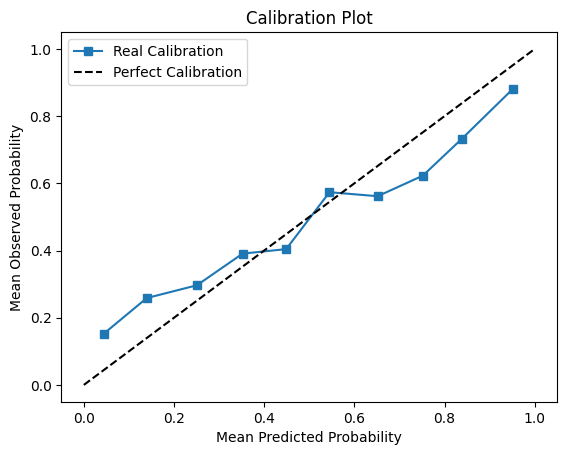

In [53]:
calibration_plot(final_test_improved["archetype_0"],"Real Calibration")

### 4.2 Results for archetype 1

In [51]:
evaluate_model(final_test_improved["archetype_1"],"arch_1")

arch_1 Evaluation:
Mean Squared Error: 0.0621
Mean Absolute Error: 0.1958
Pearson Correlation: 0.6418
Spearman Correlation: 0.6264
Standard deviation: 0.2488


(np.float64(0.06206353172680548),
 np.float64(0.19579778650212015),
 np.float64(0.6417593603145274),
 np.float64(0.6264030711969453),
 np.float64(0.24878917130648545))

0 rows were removed


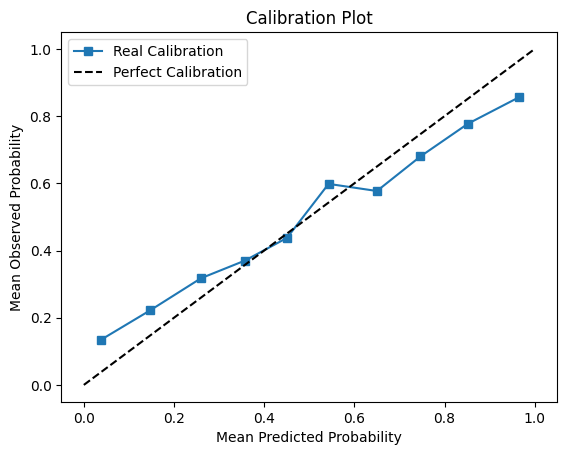

In [54]:
calibration_plot(final_test_improved["archetype_1"],"Real Calibration")

### 4.3 Results for archetype 2

In [55]:
evaluate_model(final_test_improved["archetype_2"],"arch_2")

arch_2 Evaluation:
Mean Squared Error: 0.0623
Mean Absolute Error: 0.1961
Pearson Correlation: 0.6400
Spearman Correlation: 0.6259
Standard deviation: 0.2493


(np.float64(0.062329698894918205),
 np.float64(0.19609579984886813),
 np.float64(0.6400312442082003),
 np.float64(0.6259249540850771),
 np.float64(0.24933800229599695))

0 rows were removed


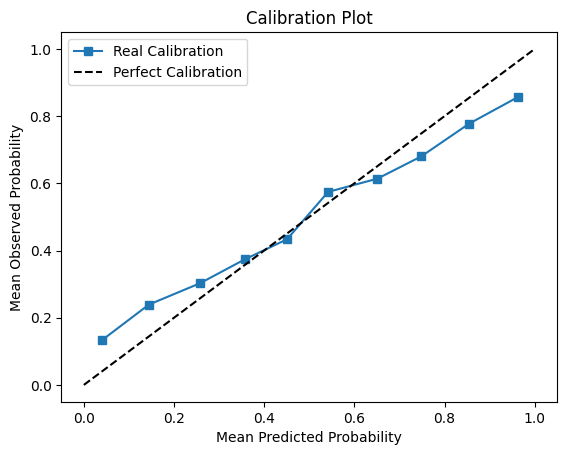

In [56]:
calibration_plot(final_test_improved["archetype_2"],"Real Calibration")

### 4.4 Results for archetype 3

In [57]:
evaluate_model(final_test_improved["archetype_3"],"arch_3")

arch_3 Evaluation:
Mean Squared Error: 0.0615
Mean Absolute Error: 0.1939
Pearson Correlation: 0.6455
Spearman Correlation: 0.6302
Standard deviation: 0.2477


(np.float64(0.0615340940517745),
 np.float64(0.1939306489152264),
 np.float64(0.6454566924392638),
 np.float64(0.6301838375413404),
 np.float64(0.24768915684310278))

0 rows were removed


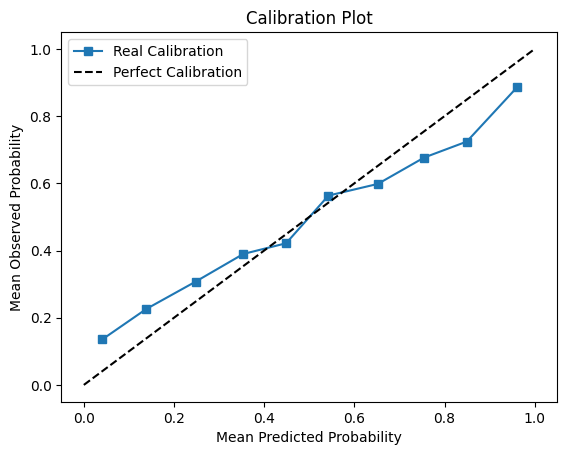

In [58]:
calibration_plot(final_test_improved["archetype_3"],"Real Calibration")

### 4.5 Results for archetype 4

In [59]:
evaluate_model(final_test_improved["archetype_4"],"arch_4")

arch_4 Evaluation:
Mean Squared Error: 0.0615
Mean Absolute Error: 0.1940
Pearson Correlation: 0.6431
Spearman Correlation: 0.6287
Standard deviation: 0.2476


(np.float64(0.061495010482968425),
 np.float64(0.19403863937779955),
 np.float64(0.6431053213515845),
 np.float64(0.6286544429990893),
 np.float64(0.24757277865910782))

0 rows were removed


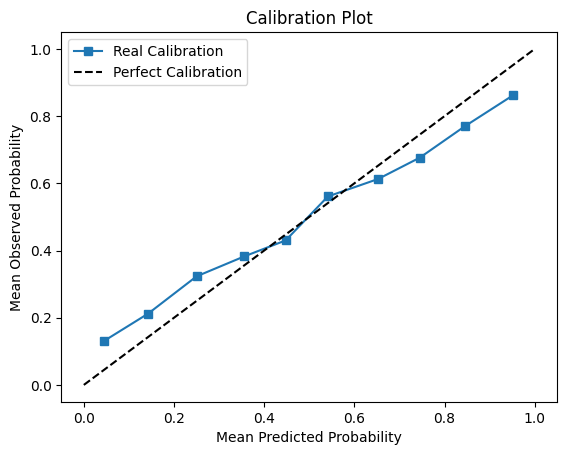

In [60]:
calibration_plot(final_test_improved["archetype_4"],"Real Calibration")

### 4.6 Results for archetype 5

In [44]:
evaluate_model(final_test_improved["archetype_5"],"arch_5")

arch_5 Evaluation:
Mean Squared Error: 0.0617
Mean Absolute Error: 0.1948
Pearson Correlation: 0.6424
Spearman Correlation: 0.6278
Standard deviation: 0.2480


(np.float64(0.061655954763853715),
 np.float64(0.1948313369310167),
 np.float64(0.6423559352306101),
 np.float64(0.6278221737356748),
 np.float64(0.24796886873513255))

0 rows were removed


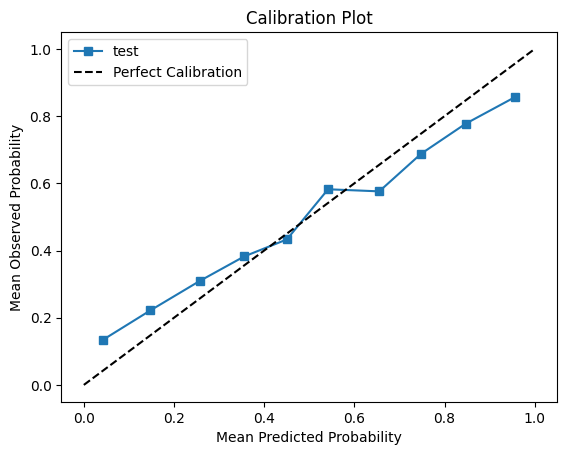

In [48]:
calibration_plot(final_test_improved["archetype_5"],"test")

In [38]:
trips_logit[(trips_logit["destination"]=="ES300")&(trips_logit["origin"]=="ES511")]

,origin,destination,path,trips,archetype_0,archetype_1,archetype_2,archetype_3,archetype_4,archetype_5,nmodes,access_time,egress_time,travel_time_0,cost_0,emissions_0,mct_time_0_1,travel_time_1,cost_1,emissions_1,mct_time_1_2,travel_time_2,cost_2,emissions_2,total_travel_time,total_cost,total_emissions,noption,trips_per_od_pair,trips_per_od_pair_arch_0,prob_per_od_pair_arch_0,trips_per_od_pair_arch_1,prob_per_od_pair_arch_1,trips_per_od_pair_arch_2,prob_per_od_pair_arch_2,trips_per_od_pair_arch_3,prob_per_od_pair_arch_3,trips_per_od_pair_arch_4,prob_per_od_pair_arch_4,trips_per_od_pair_arch_5,prob_per_od_pair_arch_5
1304,ES511,ES300,"['007171801', '007160000']",7098.778,4815.351893,318.515538,453.898785,493.409581,415.609147,582.541057,1.0,41.0,18.0,163.464286,52.96,14.56000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.464286,52.96,14.56000,1,9066.654,6160.964201,0.781591,404.917038,0.786619,572.072183,0.793429,629.936123,0.783269,529.978837,0.784200,746.494618,0.780369
1305,ES511,ES300,"['LEBL', 'LEMD']",1921.272,1315.669159,84.506455,115.946944,131.916042,110.851689,159.542711,1.0,123.0,63.0,85.625000,136.23,43.55375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,271.625000,136.23,43.55375,2,9066.654,6160.964201,0.213549,404.917038,0.208701,572.072183,0.202679,629.936123,0.209412,529.978837,0.209162,746.494618,0.213723
1303,ES511,ES300,"['007171801', '007117000']",46.604,29.943150,1.895045,2.226455,4.610499,3.518001,4.410850,1.0,41.0,28.0,546.000000,52.71,14.49000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615.000000,52.71,14.49000,3,9066.654,6160.964201,0.004860,404.917038,0.004680,572.072183,0.003892,629.936123,0.007319,529.978837,0.006638,746.494618,0.005909


In [40]:
filtered_df = trips_logit_improved[trips_logit_improved['path'].str.contains(r'(?=.*[a-zA-Z])(?=.*[0-9])', regex=True, na=False)]

In [41]:
filtered_df["trips"].sum()

np.float64(97.664)

In [42]:
trips_logit_improved["trips"].sum()

np.float64(196002.45900000003)

In [43]:
filtered_df["trips"].sum()/trips_logit_improved["trips"].sum()*100

np.float64(0.049827946291224834)